In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats
import itertools  
from scipy.stats import mannwhitneyu
from sklearn.tree import  plot_tree 
import numpy as np
# selection of algorithms to consider and set performance measure
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
import os
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
os.getcwd()

'C:\\Users\\Vahid\\OneDrive - University of Toronto\\MMA - 2022 -\\Jupyter files\\HR'

# Z-Score vs. Z-Modified Score

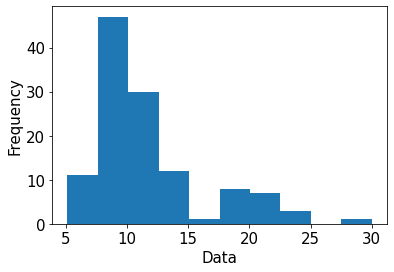

In [11]:
scores = np.concatenate([np.random.normal(10, 2, size=100), np.random.normal(20, 2, size=20)])
scores[110] = 30  # add an outlier that is not extreme

# plot a histogram of the scores
plt.hist(scores, bins=10)
plt.xlabel("Data")
plt.ylabel("Frequency")
#plt.title("Histogram of Scores")
plt.show()

In [12]:
# calculate the mean and standard deviation
mean = np.mean(scores)
std_dev = np.std(scores)
print(mean,std_dev)



# calculate the standard z-score
z_scores = (scores - mean) / std_dev


11.708353075431814 4.615782906327552


In [13]:
# calculate the modified z-score
median = np.median(scores)
mad = np.median(np.abs(scores - median))
modified_z_scores = 0.6745 * (scores - median) / mad
print(median, mad)


10.261086791364281 1.797064014947721


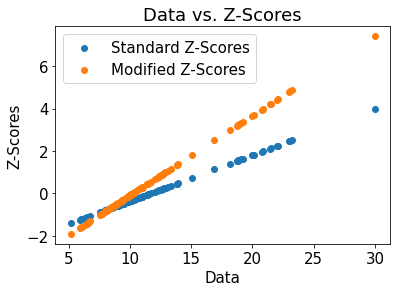

In [14]:
plt.scatter(scores, z_scores, label="Standard Z-Scores")
plt.scatter(scores,modified_z_scores, label="Modified Z-Scores")
plt.legend()
plt.ylabel("Z-Scores")
plt.xlabel("Data")
plt.title("Data vs. Z-Scores")
plt.show()

# IQR

Median value of Data 10.261086791364281
The 25th Percentile of Data 8.886230233432286
The 75th Percentile of  Data  12.695093585152007
The IQR of  Data  3.8088633517197206
The Lower Range of  Data  3.1729352058527054
The Upper Range of  Data  18.40838861273159


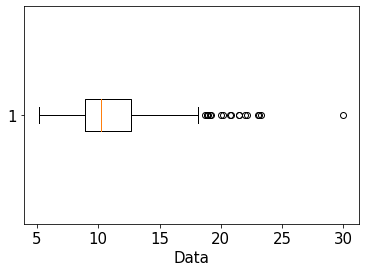

In [15]:
Q1,Q2,Q3 = np.percentile(scores , [25,50,75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print("Median value of Data",Q2)
print("The 25th Percentile of Data",Q1)
print("The 75th Percentile of  Data ",Q3)
print("The IQR of  Data ", IQR)
print("The Lower Range of  Data ",max(0,lower_range))
print("The Upper Range of  Data ",upper_range)



plt.boxplot(scores, whis=1.5, showfliers=True,showmeans=False,vert=False)
plt.xlabel('Data')
#plt.title('Box Plot with Outliers')
# show the plot
plt.show()
plt.show()

# DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


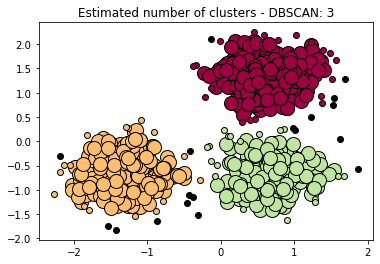

In [16]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10,metric='euclidean').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters - DBSCAN: %d' % n_clusters_)
plt.show()


Estimated number of clusters: 3
Estimated number of noise points: 0
Homogeneity: 0.945
Completeness: 0.945
V-measure: 0.945
Adjusted Rand Index: 0.968
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.650


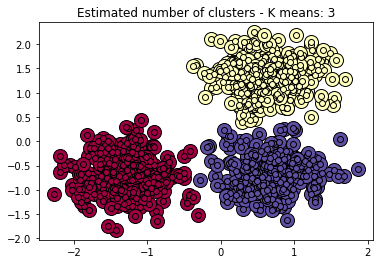

In [17]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN


db = KMeans( init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask ]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask ]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters - K means: %d' % n_clusters_)
plt.show()

Number of clusters: 3
Homogeneity: 1.0
Completeness: 0.70820218860112
V-measure: 0.945


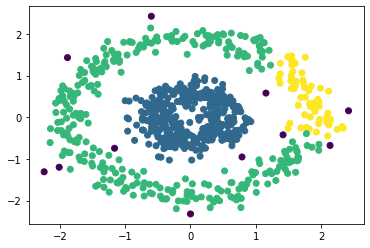

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

Number of clusters: 2
Homogeneity: 0.0006219014578548896
Completeness: 0.0006227194445584148
V-measure: 0.945


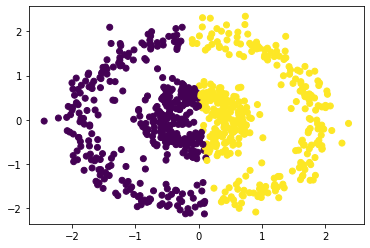

In [19]:
from sklearn.cluster import KMeans
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = KMeans( init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))


In [20]:
0.0008690775063048671*0.000870524861377679/(0.0008690775063048671+0.000870524861377679)*2

0.0008698005817391072

# Pearson vs. Spearman Correlation 

Pearson correlation coefficient: 0.252, p-value: 0.011
Spearman correlation coefficient: 1.000, p-value: 0.000


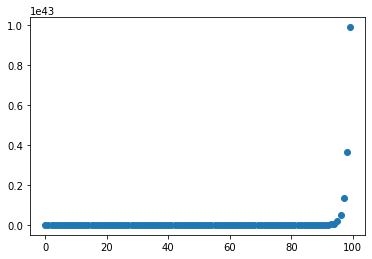

In [22]:
from scipy import stats

# Example dataset
x = range(0,100,1)
y = np.exp(x)

# Calculate Pearson correlation coefficient and p-value
corr_pearson, p_pearson = stats.pearsonr(x, y)
print(f"Pearson correlation coefficient: {corr_pearson:.3f}, p-value: {p_pearson:.3f}")

# Calculate Spearman correlation coefficient and p-value
corr_spearman, p_spearman = stats.spearmanr(x, y)
print(f"Spearman correlation coefficient: {corr_spearman:.3f}, p-value: {p_spearman:.3f}")


# Create scatter plot and add regression lines
fig, ax = plt.subplots()
ax.scatter(x, y, label='Data')
#plt.ylim(0,8000)

# Nann Whitney U-Tes vs. t-test

In [23]:
from scipy.stats import mannwhitneyu


group1 = [1, 2, 3, 4, 5]
group2 = [6, 7, 8, 9, 10]

# Calculate the Mann-Whitney U test statistic and p-value
statistic, p_value = mannwhitneyu(group1, group2)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 0.0
p-value: 0.007936507936507936


# Chi-Squre test of Independency

In [24]:
from scipy.stats import chi2_contingency

# Define the contingency table
observed = [[10, 20, 30],
            [15, 25, 35],
            [5, 10, 15]]

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected frequencies
statistic, p_value, dof, expected = chi2_contingency(observed)

# Print the results
print("Chi-square test statistic:", statistic)
print("p-value:", p_value)


Chi-square test statistic: 0.34375000000000006
p-value: 0.9868176880586512


# ANOVA Test

In [25]:
from scipy import stats

# Define the data for each group
group1 = [5, 7, 9, 11, 13]
group2 = [2, 4, 6, 8, 10]
group3 = [1, 3, 5, 7, 9]

# Perform the one-way ANOVA
f_value, p_value = stats.f_oneway(group1, group2, group3)

# Print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 2.166666666666667
p-value: 0.15726733391116482


# Ridge Regression for Variable Selections

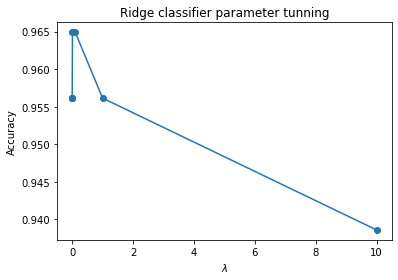

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

#scaler = StandardScaler()

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train_scaled = scaler.fit_transform(X_train)

# define a list of alpha values to test
n_alphas = 200
alphas = [0,.0001,.001,.01,.1,1,10]

# initialize an empty list to store the accuracy scores
accuracy_values = []

# loop over the alpha values
for alpha in alphas:
    # create a Ridge classifier object with the current alpha value
    ridge = RidgeClassifier(alpha=alpha)
    
    # fit the model to the training data
    ridge.fit(X_train, y_train)
    
    # make predictions on the test data
    y_pred = ridge.predict(X_test)
    
    # compute the accuracy score and append it to the list
    accuracy_values.append(accuracy_score(y_test, y_pred))

# plot the accuracy scores against the alpha values
plt.plot(alphas, accuracy_values, '-o')
#plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Accuracy')
plt.title('Ridge classifier parameter tunning')
plt.show()

# Distance Matrix for Data with Categorical and Numerical Values

In [2]:
import gower
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric

In [13]:
df = pd.DataFrame({'age':[14,19,10,14,21,19,30,35],
                  'pre_testscore':[4,24,31,3,3,4,31,9],
                  'available_credit':[2200,1000,22000,2100,2000,1000,6000,2200],
                  'gender':['M','M','M','M','F','F','F','F']})

In [14]:
df

,age,pre_testscore,available_credit,gender
0,14,4,2200,M
1,19,24,1000,M
2,10,31,22000,M
3,14,3,2100,M
4,21,3,2000,F
5,19,4,1000,F
6,30,31,6000,F
7,35,9,2200,F


In [46]:
s1 = DistanceMetric.get_metric('manhattan').pairwise(df[['age']])
s1 = s1/max(np.ptp(df['age']),1)
s1

array([[0.  , 0.2 , 0.16, 0.  , 0.28, 0.2 , 0.64, 0.84],
       [0.2 , 0.  , 0.36, 0.2 , 0.08, 0.  , 0.44, 0.64],
       [0.16, 0.36, 0.  , 0.16, 0.44, 0.36, 0.8 , 1.  ],
       [0.  , 0.2 , 0.16, 0.  , 0.28, 0.2 , 0.64, 0.84],
       [0.28, 0.08, 0.44, 0.28, 0.  , 0.08, 0.36, 0.56],
       [0.2 , 0.  , 0.36, 0.2 , 0.08, 0.  , 0.44, 0.64],
       [0.64, 0.44, 0.8 , 0.64, 0.36, 0.44, 0.  , 0.2 ],
       [0.84, 0.64, 1.  , 0.84, 0.56, 0.64, 0.2 , 0.  ]])

In [48]:
s2 = DistanceMetric.get_metric('manhattan').pairwise(df[['pre_testscore']])
s2 = s2/max(np.ptp(df['pre_testscore']),1)
s2

array([[0.        , 0.71428571, 0.96428571, 0.03571429, 0.03571429,
        0.        , 0.96428571, 0.17857143],
       [0.71428571, 0.        , 0.25      , 0.75      , 0.75      ,
        0.71428571, 0.25      , 0.53571429],
       [0.96428571, 0.25      , 0.        , 1.        , 1.        ,
        0.96428571, 0.        , 0.78571429],
       [0.03571429, 0.75      , 1.        , 0.        , 0.        ,
        0.03571429, 1.        , 0.21428571],
       [0.03571429, 0.75      , 1.        , 0.        , 0.        ,
        0.03571429, 1.        , 0.21428571],
       [0.        , 0.71428571, 0.96428571, 0.03571429, 0.03571429,
        0.        , 0.96428571, 0.17857143],
       [0.96428571, 0.25      , 0.        , 1.        , 1.        ,
        0.96428571, 0.        , 0.78571429],
       [0.17857143, 0.53571429, 0.78571429, 0.21428571, 0.21428571,
        0.17857143, 0.78571429, 0.        ]])

In [49]:
s3 = DistanceMetric.get_metric('manhattan').pairwise(df[['available_credit']])
s3 = s3/max(np.ptp(df['available_credit']),1)
s3

array([[0.        , 0.05714286, 0.94285714, 0.0047619 , 0.00952381,
        0.05714286, 0.18095238, 0.        ],
       [0.05714286, 0.        , 1.        , 0.05238095, 0.04761905,
        0.        , 0.23809524, 0.05714286],
       [0.94285714, 1.        , 0.        , 0.94761905, 0.95238095,
        1.        , 0.76190476, 0.94285714],
       [0.0047619 , 0.05238095, 0.94761905, 0.        , 0.0047619 ,
        0.05238095, 0.18571429, 0.0047619 ],
       [0.00952381, 0.04761905, 0.95238095, 0.0047619 , 0.        ,
        0.04761905, 0.19047619, 0.00952381],
       [0.05714286, 0.        , 1.        , 0.05238095, 0.04761905,
        0.        , 0.23809524, 0.05714286],
       [0.18095238, 0.23809524, 0.76190476, 0.18571429, 0.19047619,
        0.23809524, 0.        , 0.18095238],
       [0.        , 0.05714286, 0.94285714, 0.0047619 , 0.00952381,
        0.05714286, 0.18095238, 0.        ]])

In [50]:
f =  df.loc[:,'gender']
dummy_df = pd.get_dummies(f)
dummy_df

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0


In [51]:
s4 = DistanceMetric.get_metric('dice').pairwise(dummy_df)
pd.DataFrame(s4)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [23]:
w1=w2=w3=w4=1

In [53]:
Gowers_Distance = (s1*w1 + s2*w2 + s3*w3+ s4*w4)/(w1 + w2 + w3+w4) 
pd.DataFrame(Gowers_Distance)

,0,1,2,3,4,5,6,7
0,0.000000,0.058184,0.941911,0.004797,0.009927,0.057281,0.182578,0.001282
1,0.058184,0.000000,0.998195,0.053482,0.048637,0.000997,0.238387,0.058516
2,0.941911,0.998195,0.000000,0.946708,0.951838,0.999193,0.760948,0.942719
3,0.004797,0.053482,0.946708,0.000000,0.005130,0.052579,0.187375,0.006080
4,0.009927,0.048637,0.951838,0.005130,0.000000,0.047639,0.191745,0.010449
5,0.057281,0.000997,0.999193,0.052579,0.047639,0.000000,0.239289,0.057994
6,0.182578,0.238387,0.760948,0.187375,0.191745,0.239289,0.000000,0.181771
7,0.001282,0.058516,0.942719,0.006080,0.010449,0.057994,0.181771,0.000000


In [25]:
import gower

In [26]:
gower.gower_matrix(df)

array([[0.        , 0.24285714, 0.51678574, 0.01011905, 0.33130953,
        0.31428573, 0.6963095 , 0.50464284],
       [0.24285714, 0.        , 0.4025    , 0.25059524, 0.46940476,
        0.42857143, 0.4820238 , 0.5582143 ],
       [0.51678574, 0.4025    , 0.        , 0.52690476, 0.84809524,
        0.83107144, 0.64047617, 0.93214285],
       [0.01011905, 0.25059524, 0.52690476, 0.        , 0.32119048,
        0.3220238 , 0.7064286 , 0.5147619 ],
       [0.33130953, 0.46940476, 0.84809524, 0.32119048, 0.        ,
        0.04083334, 0.38761905, 0.19595239],
       [0.31428573, 0.42857143, 0.83107144, 0.3220238 , 0.04083334,
        0.        , 0.41059524, 0.21892858],
       [0.6963095 , 0.4820238 , 0.64047617, 0.7064286 , 0.38761905,
        0.41059524, 0.        , 0.29166666],
       [0.50464284, 0.5582143 , 0.93214285, 0.5147619 , 0.19595239,
        0.21892858, 0.29166666, 0.        ]], dtype=float32)